In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

# PART 3 


## reading files

In [2]:
signal1, sample_rate1 = librosa.load("S1_301_07.wav")
signal2 , sample_rate2 = librosa.load("S2_127_06.wav")

## preprocessing

In [3]:
frame_size = 32/1000 # seconds
hop_size = 10/1000 # seconds
pre_emphasis_value = 0.97
window= "hamming"

pre_emphasis

In [4]:
def pre_emphasis(signal,pre_emphasis_value):
    return np.append(signal[0], signal[1:] - pre_emphasis_value * signal[:-1])
    

framming

In [5]:
def framming(signal,frame_length,hop_size,sample_rate):
    frame_step = hop_size * sample_rate
    signal_lenght = len(signal)
    frame_length = int(round(frame_length))
    frame_step = int(round(frame_step))
    num_frames = int(np.ceil(float(np.abs(signal_lenght - frame_length)) / frame_step))
    pad_signal_length = num_frames * frame_step + frame_length
    z = np.zeros((pad_signal_length - signal_lenght))
    pad_signal = np.append(signal, z) 
    indices = np.tile(np.arange(0, frame_length), (num_frames, 1)) + np.tile(np.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
    frames = pad_signal[indices.astype(np.int32, copy=False)]
    return frames

windowing

In [6]:
def windowing(frames , frame_length , window_type=np.hamming):
    if window_type is not None:
        return frames*window_type(frame_length)
    else:
        return frames

preprocessing signals

In [7]:
def preprocess(signal,sample_rate,frame_size,hop_size,pre_emphasis_value,window_type=np.hamming , use_emphasis=True):
    frame_length = frame_size*sample_rate
    if use_emphasis:
        signal = pre_emphasis(signal,pre_emphasis_value)
    framing_signals = framming(signal,frame_length,hop_size,sample_rate)
    return windowing(framing_signals,frame_length,window_type)
    

In [8]:
preprocessed_signals1 = preprocess(signal1,sample_rate1,frame_size,hop_size,pre_emphasis_value,np.hamming) 
preprocessed_signals2 = preprocess(signal2,sample_rate2,frame_size,hop_size,pre_emphasis_value,np.hamming) 



# PART 4 

In [9]:
magnitude_frames1 = abs(np.fft.rfft(preprocessed_signals1,512))
magnitude_frames2 = abs(np.fft.rfft(preprocessed_signals2,512))

# PART 5

## for signal 1

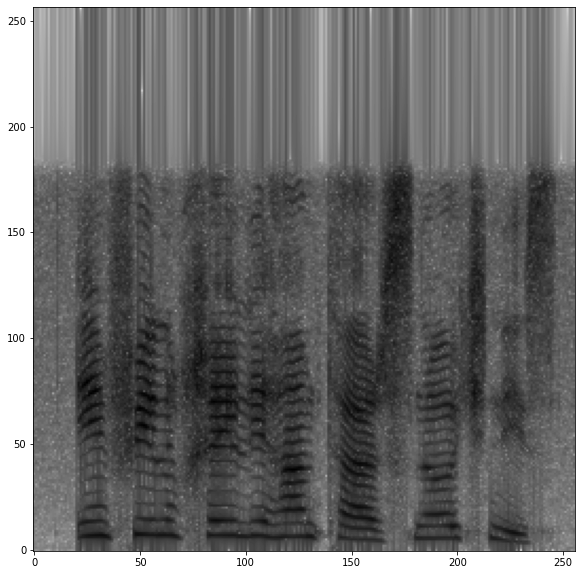

In [12]:
plt.figure(figsize=(20,10))
plt.imshow(20 * np.log10(magnitude_frames1).T , cmap=plt.cm.binary,origin="lower",)

## for signal 2

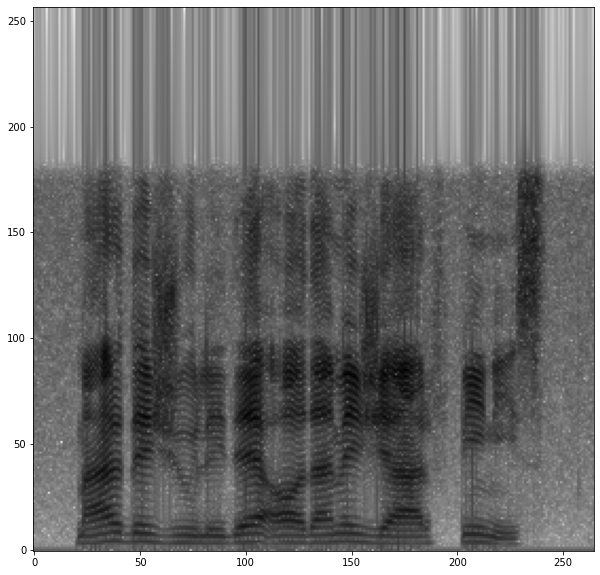

In [14]:
plt.figure(figsize=(20,10))
plt.imshow(20 * np.log10(magnitude_frames2).T , cmap=plt.cm.binary,origin="lower",)

# PART 6

In [15]:
spectogrm_plt = lambda signal: plt.imshow(librosa.amplitude_to_db(abs(librosa.stft(signal))),cmap=plt.cm.binary,origin="lower",aspect='auto')

## for signal 1

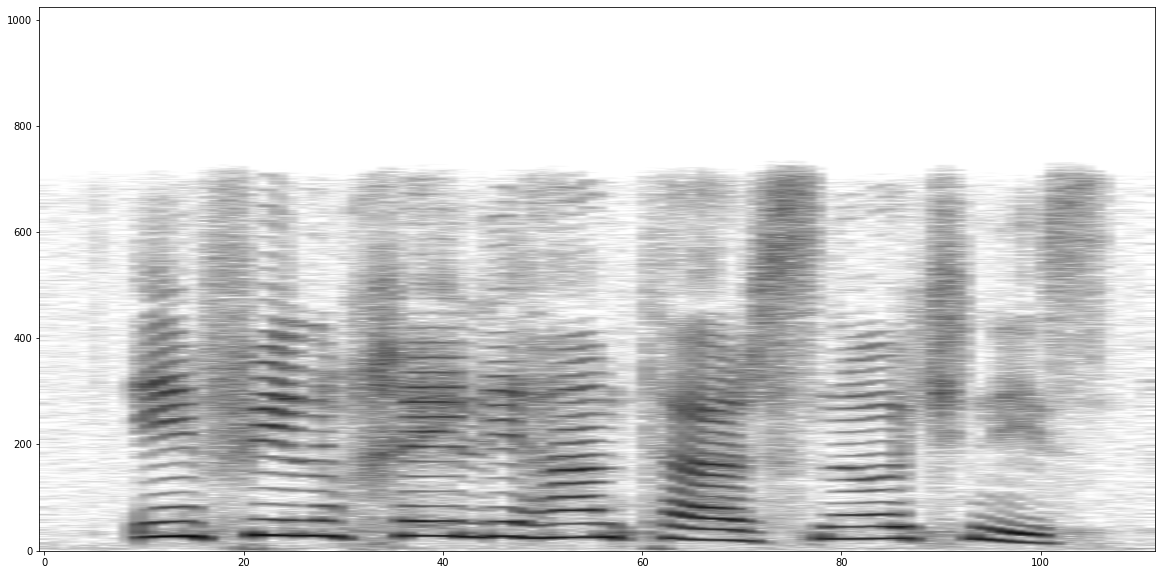

In [17]:
plt.figure(figsize=(20,10))
spectogrm_plt(signal1)

## for signal 2

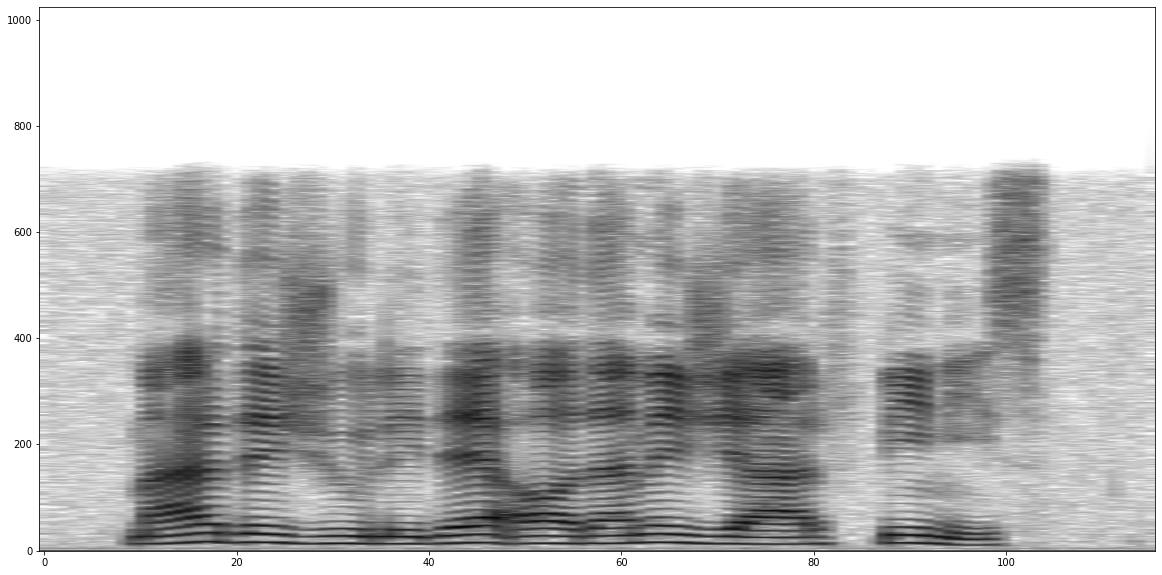

In [18]:
plt.figure(figsize=(20,10))
spectogrm_plt(signal2)

# PART 7

In [19]:
def get_vowel_index(magnitud_frames):
    mean_frames = np.mean(magnitud_frames**2,axis=1)    
    return np.argmax(mean_frames)


In [20]:
index = get_vowel_index(magnitude_frames1)
frame = preprocessed_signals1[index]
magnitude_frame = magnitude_frames1[index]

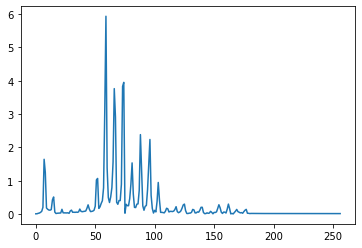

In [57]:
plt.plot(magnitude_frame)

In [25]:
index

52

In [26]:
a = ipd.Audio(data=preprocessed_signals1[:index+1].flatten(),rate=sample_rate1)
ipd.display(a)

# PART 8

In [40]:
def get_mean_pithes(magnitud_frames,simple_rate):
    pitches, _ = librosa.piptrack(S=magnitud_frames, sr=simple_rate, threshold=1,ref=np.mean)
    return np.mean(pitches,axis=1)
        
    

In [41]:
pitches = get_mean_pithes(magnitude_frames1,sample_rate1)
for i,pitch in enumerate(pitches):
    print(f"{i} => {pitch}")

0 => 0.0
1 => 0.0
2 => 0.0
3 => 0.0
4 => 0.0
5 => 0.0
6 => 0.0
7 => 0.0
8 => 0.0
9 => 0.0
10 => 0.0
11 => 0.0
12 => 0.0
13 => 0.0
14 => 0.0
15 => 0.0
16 => 0.0
17 => 0.0
18 => 0.0
19 => 0.0
20 => 236.8556508654095
21 => 78.36133513212442
22 => 118.50459822206724
23 => 77.59473778087919
24 => 153.16062177840863
25 => 497.6306306066982
26 => 87.45195601049333
27 => 523.7997136734522
28 => 84.23182324882828
29 => 487.39130552288265
30 => 161.5779692015308
31 => 73.00402589789073
32 => 415.65967590944035
33 => 71.92205827857872
34 => 28.557890707048514
35 => 5.806710386991906
36 => 54.637135109505486
37 => 106.13195759209613
38 => 217.7544629478514
39 => 243.02670390027666
40 => 828.6464271154642
41 => 276.0423262189294
42 => 303.54183447646284
43 => 789.2162736133234
44 => 444.1174634510245
45 => 415.72293200952487
46 => 169.5993449344207
47 => 324.91906244099135
48 => 202.1684984025386
49 => 951.5801719793902
50 => 227.10094328932857
51 => 248.51515512343957
52 => 953.1643605364255
53 =>

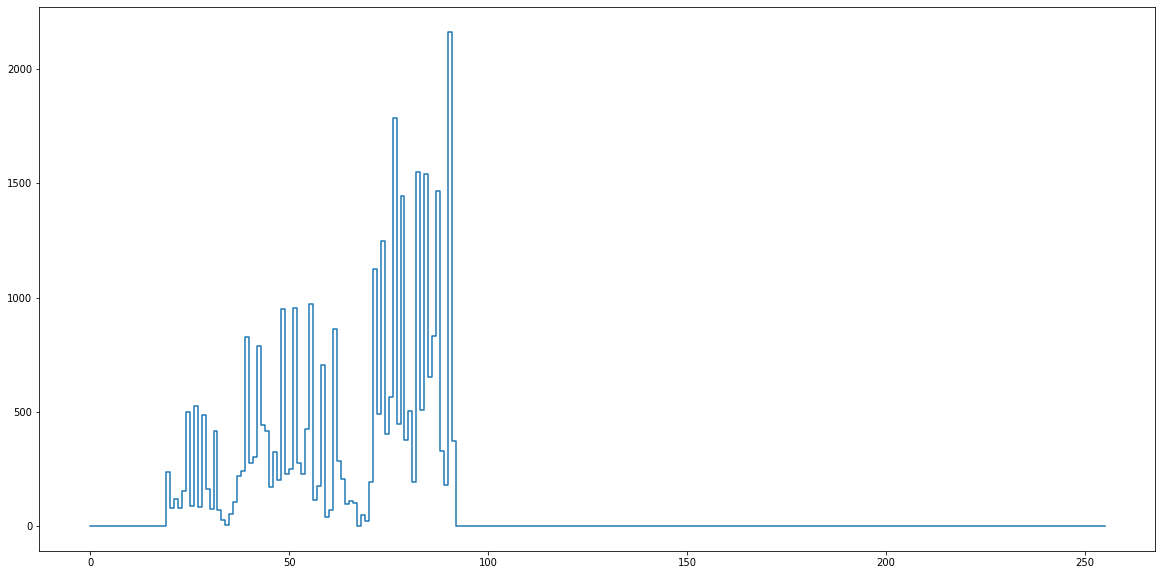

In [42]:
plt.figure(figsize=(20,10))
plt.step(range(len(pitches)),pitches)

In [60]:
vac_dar_index = 29
bi_vac_index = 68

# part 8-a

واکدار

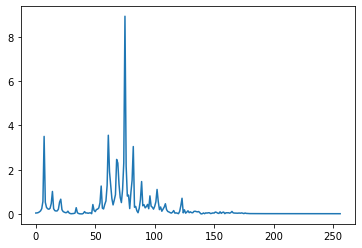

In [61]:

vac_dar_frame = preprocess(signal1,sample_rate1,frame_size,hop_size,pre_emphasis_value,None)[vac_dar_index] 
mag=abs(np.fft.rfft(vac_dar_frame,512))
plt.plot(mag)

بی واک

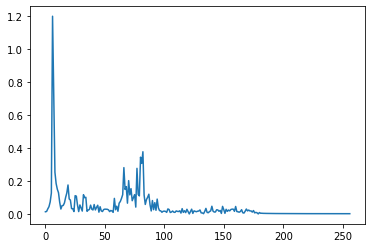

In [63]:
bi_vac_frame = preprocess(signal1,sample_rate1,frame_size,hop_size,pre_emphasis_value,None)[bi_vac_index] 
mag=abs(np.fft.rfft(bi_vac_frame,512))
plt.plot(mag)

## part 8-b

واکدار

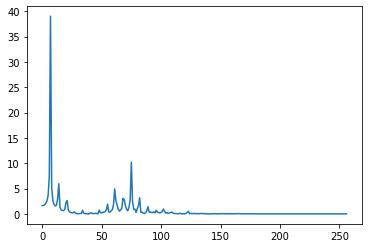

In [65]:
vac_dar_frame = preprocess(signal1,sample_rate1,frame_size,hop_size,pre_emphasis_value,None,False)[vac_dar_index] 
mag=abs(np.fft.rfft(vac_dar_frame,512))
plt.plot(mag)

بی واک

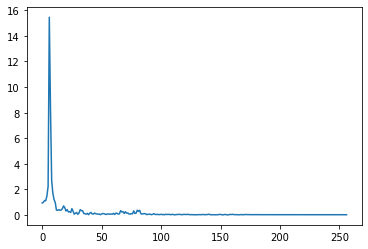

In [66]:
bi_vac_frame = preprocess(signal1,sample_rate1,frame_size,hop_size,pre_emphasis_value,None,False)[bi_vac_index] 
mag=abs(np.fft.rfft(bi_vac_frame,512))
plt.plot(mag)

# PART 9

In [102]:
def analysis_parameters(*args , **kwargs):
    frame = preprocess(**kwargs)[30] # example
    mag=abs(np.fft.rfft(frame,512))
    plt.plot(mag)
    plt.xlabel("magnitud plot")
    plt.show()
    plt.plot(frame)
    plt.xlabel("time plot")
    plt.show()


with frame_size = 32 ms

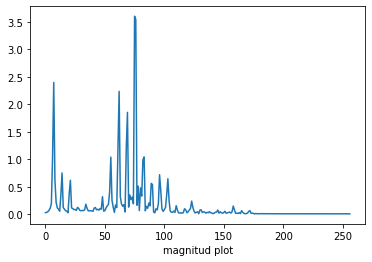

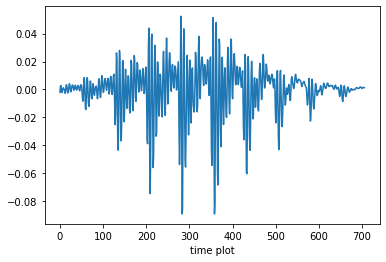

In [103]:
analysis_parameters(signal=signal1,sample_rate=sample_rate1
                    ,frame_size= 32/1000 ,hop_size=hop_size
                    ,pre_emphasis_value=pre_emphasis_value,window_type=np.hamming 
                    , use_emphasis=True)

with frame_size = 16 ms

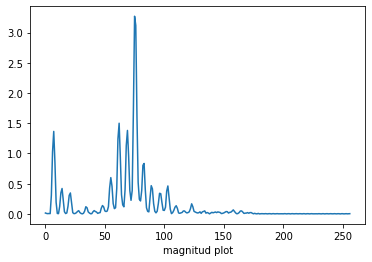

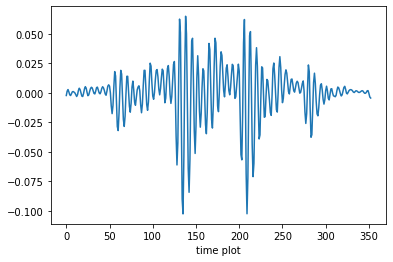

In [104]:
analysis_parameters(signal=signal1,sample_rate=sample_rate1
                    ,frame_size= 16/1000 ,hop_size=hop_size
                    ,pre_emphasis_value=pre_emphasis_value,window_type=np.hamming 
                    , use_emphasis=True)

with fram_size = 64

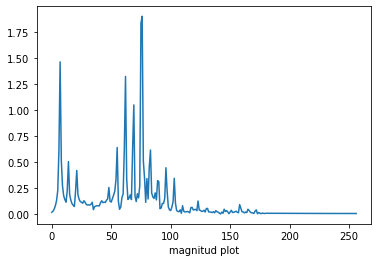

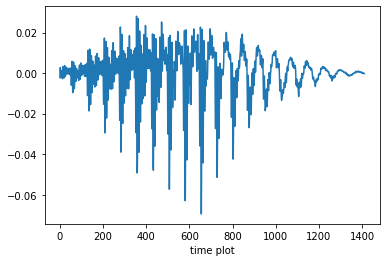

In [105]:
analysis_parameters(signal=signal1,sample_rate=sample_rate1
                    ,frame_size= 64/1000 ,hop_size=hop_size
                    ,pre_emphasis_value=pre_emphasis_value,window_type=np.hamming 
                    , use_emphasis=True)

# PART 10

In [108]:
def analysis_n_fft(n_fft, frame):
    mag=abs(np.fft.rfft(frame,n_fft))
    plt.plot(mag)
    plt.xlabel("magnitud plot")
    plt.show()


In [109]:
frame = preprocessed_signals1[30] #example

n_fft = 521

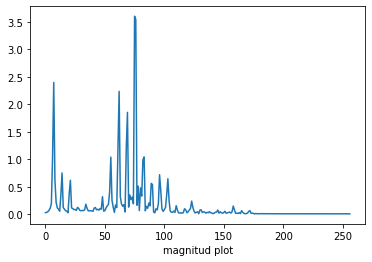

In [111]:
analysis_n_fft(n_fft=512,frame=frame)

n_fft=256

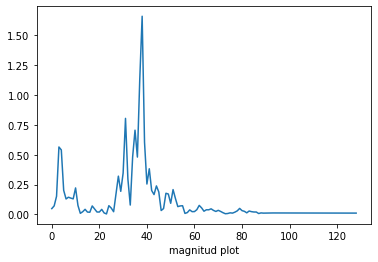

In [112]:
analysis_n_fft(n_fft=256,frame=frame)

n_fft=1024

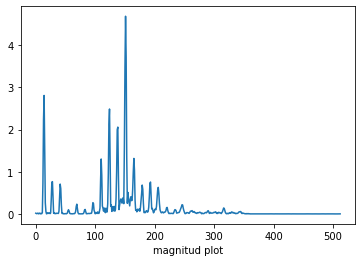

In [113]:
analysis_n_fft(n_fft=1024,frame=frame)